In [3]:

import numpy as np
import math
import pandas as pd
import logging
import sys
import matplotlib.pyplot as plt
import time
from random import shuffle
import itertools
import pickle
from numpy.linalg import inv
import operator
import seaborn as sns
from datetime import datetime, date, time

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import pickle
from modules import *
import warnings
warnings.filterwarnings("ignore")
#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', -1)

/Users/hp/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [85]:
col_rs = hp.col_rs
col_es = hp.col_es

prepath = '../data/'
p231, p222_1, p222_2, p222_3 = build_patients()



In [100]:
#select column 'duration','logduration','date'
logduration_date = p231.duration.loc[:,['duration','logduration','date']]
#convert date to datetime
logduration_date.loc[:,'date'] = np.array([datetime.combine(item, datetime.min.time()) for item in logduration_date.date])
#add epoch to 
lde = prep.addepoch(logduration_date, 'date', p231.epoch_info['start'], p231.epoch_info['end'], p231.epoch_info['num_per_epoch'])
#put labels according to the epoch
lde.loc[:,'label'] = lde.loc[:,'epoch'].apply(lambda x: epoch_label_dict['231'][x])


In [101]:
duration_231_count = p231.duration.loc[:,[col_rs,'date']].groupby('date').agg('count')
daily_231_count = p231.daily.loc[:,[col_es,'date']]
count_compare_231 = daily_231_count.set_index('date').join(duration_231_count).fillna(0).rename(columns={"region_start_time": 'duration'})
count_compare_231.loc[:, 'epi/duration'] = count_compare_231.episode_starts / count_compare_231.duration


lde = lde.set_index('date')
lde = lde.join(count_compare_231.loc[:, 'epi/duration'])
lde.loc[:,'logduration*'] = lde.loc[:,'logduration'] * lde.loc[:,'epi/duration']
lde.loc[:,'duration*'] = lde.loc[:,'duration'] * lde.loc[:,'epi/duration']

In [123]:
def plot_dist(lde, attr, title = '', xmin = 0, ymax = 0, epd = epoch_label_dict['231'], nbins = 80):
    plt.figure(figsize = (12, 12))

    for epoch in range(len(epd)):
        subset = lde[lde['epoch'] == epoch]
        color = 'r' if epd[epoch] == True else 'b'

        # Draw the density plot
        plt.hist(subset.loc[:,attr], n_bins, fill=False,color = color, density=1)
    plt.title(title)
    plt.xlim(xmin = xmin)
    if ymax != 0:
        plt.ylim(ymax = ymax)
    plt.show()


In [112]:
len(lde)

184918

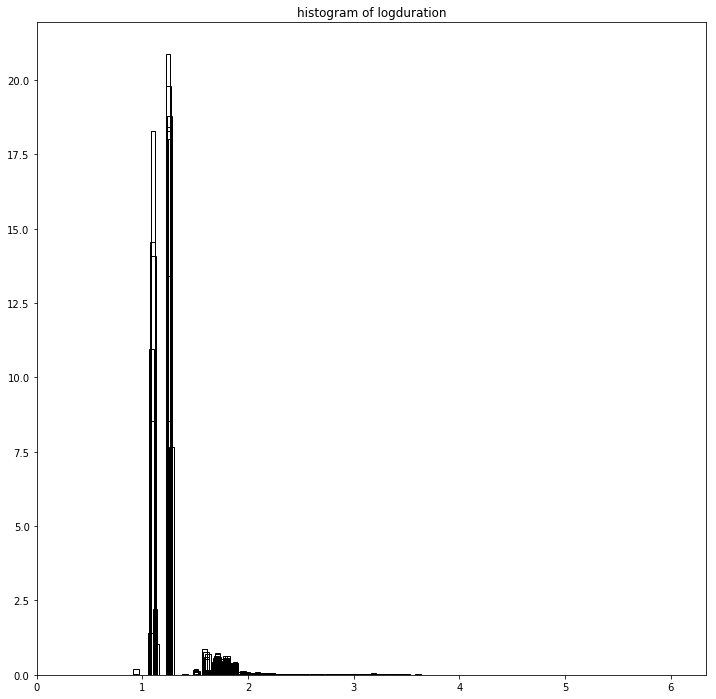

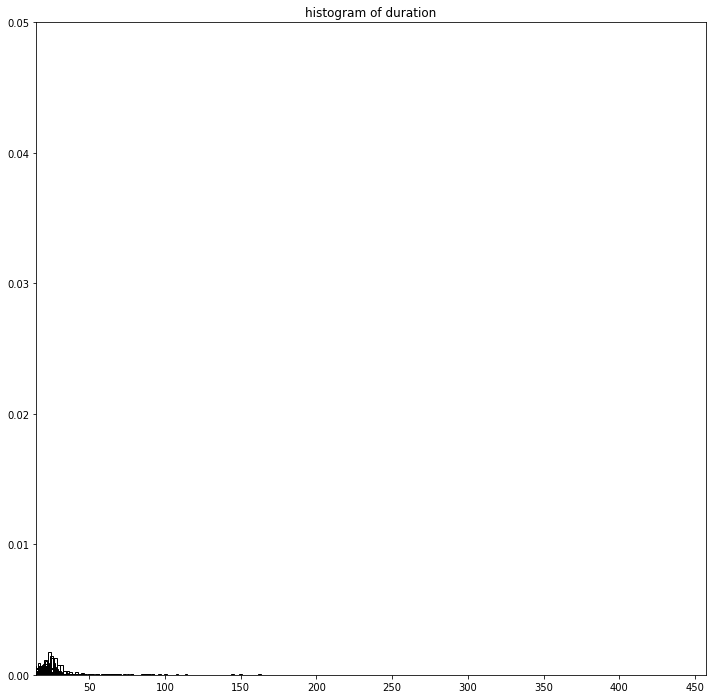

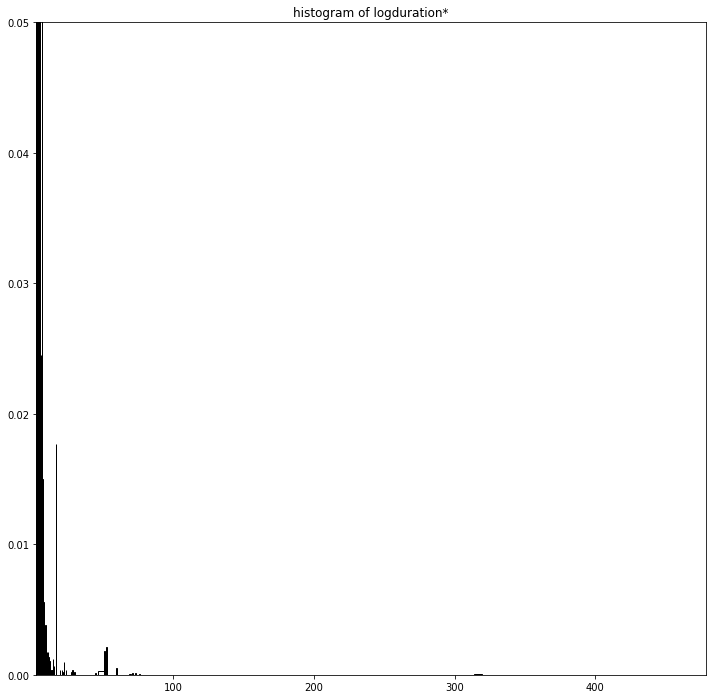

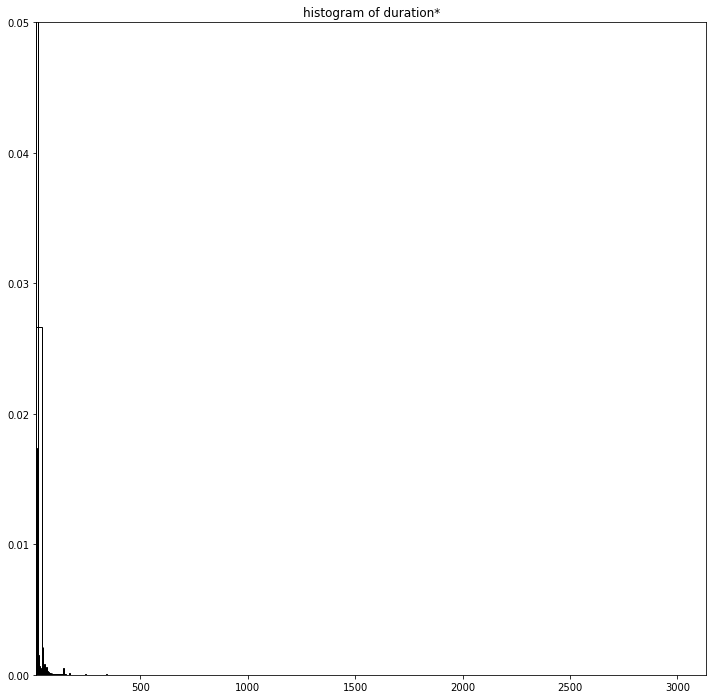

In [125]:
ymax = 0.05
plot_dist(lde, attr = 'logduration', title = 'histogram of logduration', xmin = 0, ymax = 0)


plot_dist(lde, attr = 'duration', title = 'histogram of duration', xmin = 15, ymax = ymax)

plot_dist(lde, attr = 'logduration*', title = 'histogram of logduration*', xmin = 3, ymax = ymax)
plot_dist(lde, attr = 'duration*', title = 'histogram of duration*', xmin = 15, ymax = ymax)



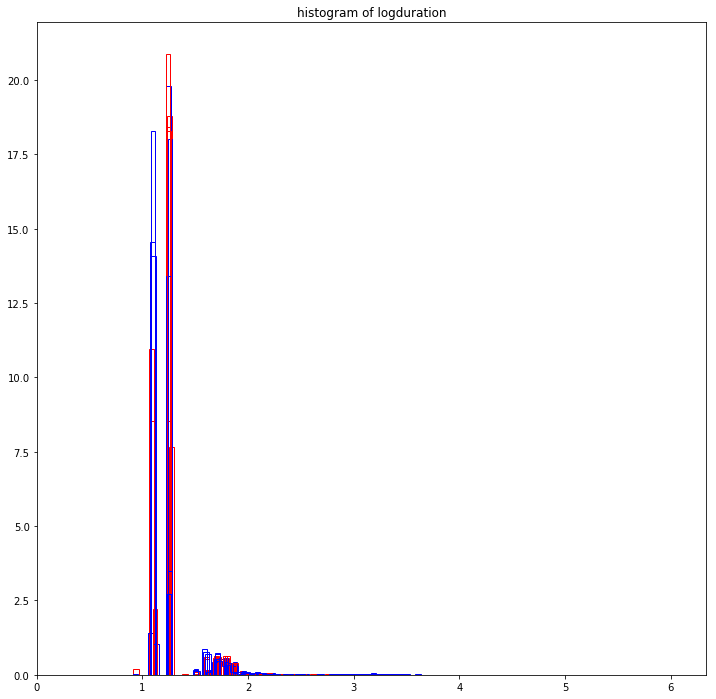

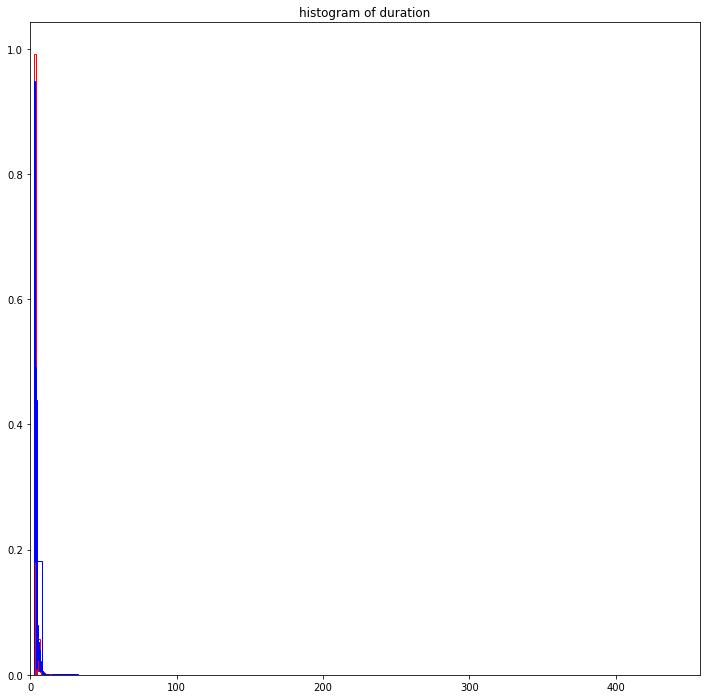

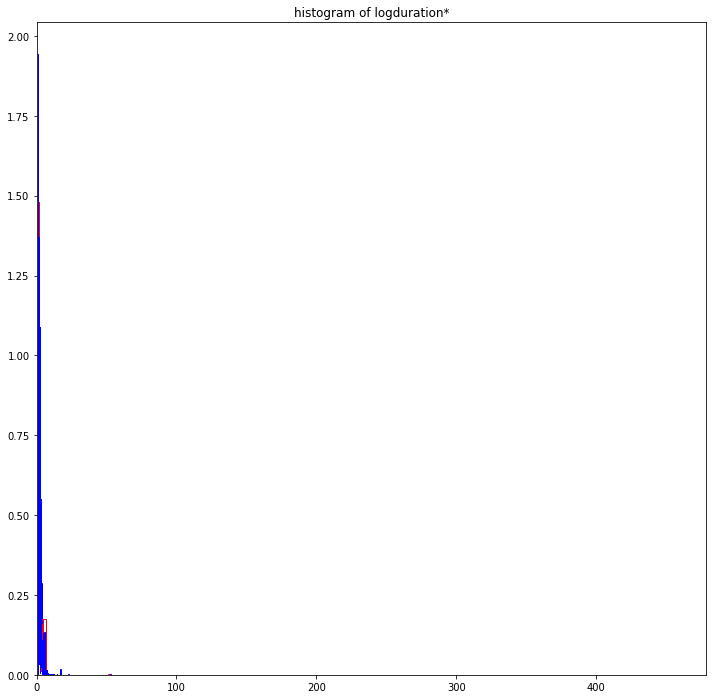

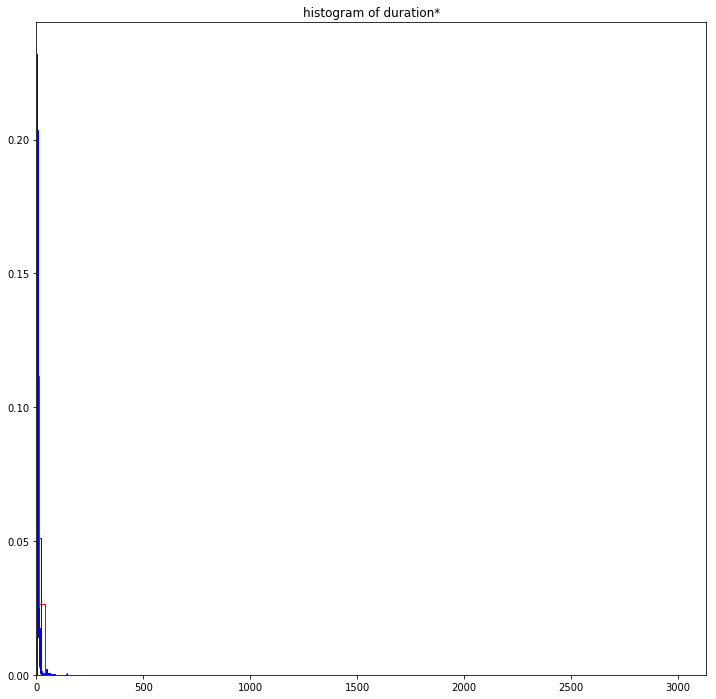

In [114]:
plot_dist(lde, attr = 'logduration', title = 'histogram of logduration')

plot_dist(lde, attr = 'duration', title = 'histogram of duration')

plot_dist(lde, attr = 'logduration*', title = 'histogram of logduration*')
plot_dist(lde, attr = 'duration*', title = 'histogram of duration*')

ValueError: columns overlap but no suffix specified: Index(['epi/duration'], dtype='object')

,duration,logduration,epoch,label,epi/duration,logduration*,0
date,,,,,,,
2017-02-07,3.0,1.098612,0.0,True,NaN,NaN,NaN
2017-02-07,3.5,1.252763,0.0,True,NaN,NaN,NaN
2017-02-07,3.5,1.252763,0.0,True,NaN,NaN,NaN
2017-02-07,3.0,1.098612,0.0,True,NaN,NaN,NaN
2017-02-07,3.0,1.098612,0.0,True,NaN,NaN,NaN
2017-02-07,3.5,1.252763,0.0,True,NaN,NaN,NaN
2017-02-07,3.0,1.098612,0.0,True,NaN,NaN,NaN
2017-02-07,3.0,1.098612,0.0,True,NaN,NaN,NaN
2017-02-07,3.5,1.252763,0.0,True,NaN,NaN,NaN


In [29]:
duration_231_count = p231.duration.loc[:,[col_rs,'date']].groupby('date').agg('count')
daily_231_count = p231.daily.loc[:,[col_es,'date']]

In [30]:
count_compare_222 = daily_222_count.set_index('date').join(duration_222_count).fillna(0).rename(columns={"region_start_time": 'duration'})

NameError: name 'daily_222_count' is not defined

In [61]:
count_compare_231 = daily_231_count.set_index('date').join(duration_231_count).fillna(0).rename(columns={"region_start_time": 'duration'})

In [62]:
count_compare_231.loc[:, 'epi/duration'] = count_compare_231.episode_starts / count_compare_231.duration

In [63]:
date_ratio_dict = count_compare_231.loc[:,'epi/duration'].to_dict()

In [ ]:
logduration_date = p231.duration.loc[:,['duration','date']]
logduration_date.loc[:,'date'] = np.array([datetime.combine(item, datetime.min.time()) for item in logduration_date.date])

logduration_date_epoch = prep.addepoch(logduration_date, 'date', p231.epoch_info['start'], p231.epoch_info['end'], p231.epoch_info['num_per_epoch'])
#put labels according to the epoch
logduration_date_epoch.loc[:,'label'] = logduration_date_epoch.loc[:,'epoch'].apply(lambda x: epoch_label_dict['231'][x])
plt.figure(figsize = (8, 8))
epd = epoch_label_dict['231']
for epoch in range(len(epd):
    subset = logduration_date_epoch[logduration_date_epoch['epoch'] == epoch]
    color = 'r' if epd[epoch] == True else 'b'
    # Draw the density plot
    sns.distplot(subset['duration'], hist = True, bins = 10, color = color)
plt.show()

In [ ]:
output_prepath = '../fig/'
count_compare_222.to_csv(output_prepath + 'count_compare_222.csv')
count_compare_231.to_csv(output_prepath + 'count_compare_231.csv')